## Lead Scoring Analysis for X Education
### Objective
An education company named X Education sells online courses to industry professionals. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


1. Importing the data and understanding
2. Data Cleaning 
- Missing Value Treatment
- Outlier Treatment
- Numerical Column Multicollinearity check
- Categorical Variable Imputation
- Dropping unnecessary columns
- Creating Dummy Variables for Categorical Columns
3. Model Building
- Train and Test Split
- Feature Scaling
- Feature Selection from RFE
- Creating a Model
- Assessing model with statsmodel
- Checking VIF
- Performing Iterations
- Predicting on Training dataset
- Plotting ROC Curve
- Find Optimal Probability cut-off
- Finding Accuracy, Sensitivity and Specificity
- Making Predictions on Test dataset
- Evaluating the metrics for test dataset
4. Adding a Lead Score to data frame
5. Finding the final Equation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
Lead_df=pd.read_csv('Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Creating a copy of original dataset
lead_original=Lead_df.copy()

In [4]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_df.shape

(9240, 37)

In [6]:
Lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
Lead_df.agg(['count','size','nunique'])

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9204,9240,9240,9240,9103,9240,9103,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022,5022,9240,9240,9240
size,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
nunique,9240,9240,5,21,2,2,2,41,1731,114,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,12,10,1,2,16


In [8]:
# Dropping columns which have only one value which are insignificant like `ProspectID`, `Lead Number`
#
Lead_df.drop(['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','City','I agree to pay the amount through cheque', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',],axis=1,inplace=True)

In [9]:
# Verifying the shape of dataset after removing the unecessary columns
Lead_df.shape

(9240, 27)

In [10]:
# Many columns in the dataset have 'Select' value, we replace it by 'NaN'
Lead_df = Lead_df.replace("Select",np.nan)

In [11]:
## Checking missing values
Lead_df.isnull().sum()/len(Lead_df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [12]:
#Rather than removing each column seperately, lets define a function which can remove columns with more than 40% null values. 

def missing_values(Lead_df, percentage):
    columns = Lead_df.columns
    percent_missing = Lead_df.isnull().sum() * 100 / len(Lead_df)
    missing_value_Lead_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    missing_drop = list(missing_value_Lead_df[missing_value_Lead_df.percent_missing > percentage].column_name)
    print(missing_drop)
    Lead_df = Lead_df.drop(missing_drop, axis=1)
    return Lead_df




In [13]:
#we will create new dataframe Lead_dropnull which have all columns other than 40% null values
Lead_dropnull= missing_values(Lead_df, percentage= 40)
Lead_dropnull

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,No,SMS Sent


In [14]:
Lead_dropnull.shape

(9240, 22)

In [15]:
## Checking missing values
Lead_dropnull.isnull().sum()/len(Lead_df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

### Let's now deal with the binary value columns

In [16]:
two_val_col=[]
for col in Lead_dropnull.columns:
    if len(Lead_dropnull[col].value_counts(dropna=False))==2:
        two_val_col.append(col)
two_val_col

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [17]:
for col in two_val_col:
    print(Lead_dropnull[col].value_counts(dropna=False),'\n')

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

No     9226
Yes      14
Name: Search, dtype: int64 

No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

No     9239
Yes       1
Name: X Education Forums, dtype: int64 

No     9239
Yes       1
Name: Newspaper, dtype: int64 

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

No     9233
Yes       7
Name: Through Recommendations, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



In [18]:
# We want to keep these columns as the imbalance does not seem so significant 
#'Converted','A free copy of Mastering The Interview','Do not Email'
# We will drop other columns from Lead_dropnull Dataset
Lead_dropnull.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis=1,inplace=True)

In [19]:
# Checking the number of columns left
Lead_dropnull.shape

(9240, 15)

In [20]:
Lead_dropnull.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


### Let's explore numerical columns

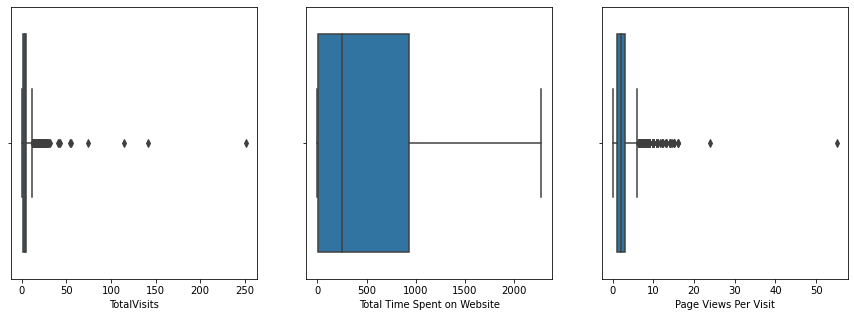

In [21]:
# Plotting a boxplot for the numerical columns to check outliers
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,5))
for i in enumerate(num_cols):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data =Lead_dropnull)
plt.show()

In [22]:
#### We see that columns TotalVisits and Page Views Per Visit have many outliers in the upper range 
#### So capping the two columns

In [23]:
cap_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i, col in enumerate(cap_cols):
    q4 = Lead_dropnull[col].quantile(0.99)
    Lead_dropnull[col][Lead_dropnull[col]>=q4] = q4

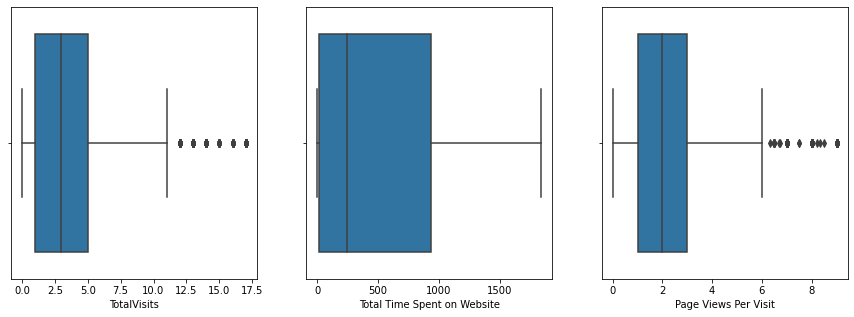

In [24]:
plt.figure(figsize=(15,5))
for i in enumerate(cap_cols):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data =Lead_dropnull)
plt.show()

In [25]:
Lead_dropnull[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.332747,486.510793,2.334002
std,3.252420,544.845436,1.985712
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,17.000000,1840.610000,9.000000


In [26]:
# Imputing missing values in TotalVisits and Page Views Per Visit equal to mean
Lead_dropnull.loc[Lead_dropnull['TotalVisits'].isnull(),'TotalVisits']=Lead_dropnull['TotalVisits'].mean()
Lead_dropnull.loc[Lead_dropnull['Page Views Per Visit'].isnull(),'Page Views Per Visit']=Lead_dropnull['Page Views Per Visit'].mean()

In [27]:
## Let's describe the columns to validate
Lead_dropnull[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.332747,486.510793,2.334002
std,3.228216,544.845436,1.970934
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,17.000000,1840.610000,9.000000


In [28]:
Lead_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   float64
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

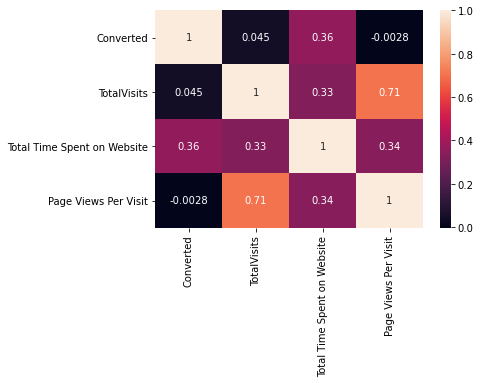

In [29]:
# Checking heatmap to find muticollinearity
sns.heatmap(Lead_dropnull.corr(),annot=True)

Dropping Page Views Per Visit since it has high correlation with Totalvisits

In [30]:
Lead_dropnull.drop('Page Views Per Visit',inplace=True,axis=1)

### Let's explore Categorical Columns

In [31]:
Lead_dropnull.shape

(9240, 14)

In [32]:
list(set(Lead_dropnull.columns)-set(Lead_dropnull.describe().columns))

['A free copy of Mastering The Interview',
 'Tags',
 'What matters most to you in choosing a course',
 'Lead Origin',
 'Lead Source',
 'Specialization',
 'Last Notable Activity',
 'Do Not Email',
 'What is your current occupation',
 'Last Activity',
 'Country']

In [33]:
Lead_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   float64
 6   Last Activity                                  9137 non-null   object 
 7   Country                                        6779 non-null   object 
 8   Specialization                                 5860 non-null   object 
 9   What is your current occupation                6550 

In [34]:
# Checking values of Lead Source column
Lead_dropnull['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [35]:
# We can see here that we have two similar categories 'Google' and 'google'
Lead_dropnull['Lead Source'] = Lead_dropnull['Lead Source'].replace(['google'], 'Google')

In [36]:
Lead_dropnull['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [37]:
# Putting categories from Lead Source having single digit count in category 'Others'
source_lst=Lead_dropnull['Lead Source'].value_counts()
source_lst=source_lst[source_lst<10].index.to_list()
source_lst

['bing',
 'Click2call',
 'Live Chat',
 'Press_Release',
 'Social Media',
 'testone',
 'welearnblog_Home',
 'NC_EDM',
 'youtubechannel',
 'WeLearn',
 'Pay per Click Ads',
 'blog']

In [38]:
#Replacing the coulumns
Lead_dropnull['Lead Source'] = Lead_dropnull['Lead Source'].replace(source_lst,'Others')

In [39]:
Lead_dropnull['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
Others                23
Name: Lead Source, dtype: int64

In [40]:
# Replacing null values with mode
Lead_dropnull.loc[(Lead_dropnull['Lead Source'].isnull()==True),  'Lead Source'] = Lead_dropnull['Lead Source'].mode()[0]

In [41]:
Lead_dropnull['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

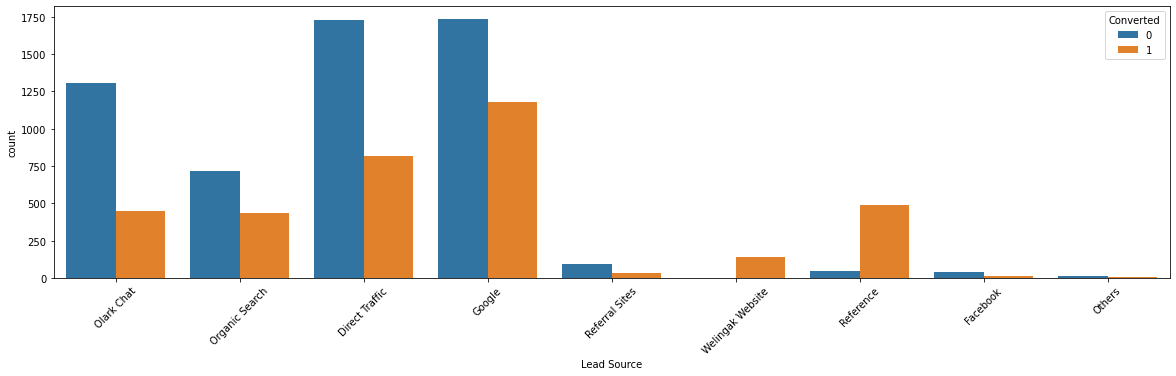

In [42]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

- `Google`, `olark Chat` and `Direct Traffic` are the top converted categories in Lead Source.<br>
- We can see that for `Welingak Website` all the leads have converted.
- `Facebook` has high conversion rate

In [43]:
# Let's check the country column
Lead_dropnull['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
China                      2
Ghana                      2
Italy                      2
Belgium                    2
Netherlands                2
Vietnam                    1
Denmark                    1
Liberia                    1
Switzerland                1
Kenya                      1
Indonesia     

In [44]:
# We can see that around 30% of total values are null.
# We cannot impute them with mode.
# We can mark them as 'Unknown'
# We can also replace 'unknown' category as 'Unknown'
Lead_dropnull['Country']=Lead_dropnull['Country'].replace(['unknown'],'Unknown')

In [45]:
Lead_dropnull['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
Unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
China                      2
Italy                      2
Asia/Pacific Region        2
Netherlands                2
Belgium                    2
Uganda                     2
Bangladesh                 2
Philippines                2
Ghana                      2
Liberia                    1
Switzerland                1
Denmark                    1
Tanzania                   1
Kenya                      1
Indonesia     

In [46]:
# Replacing null values with 'Unknown' for Last Activity
Lead_dropnull.loc[(Lead_dropnull['Country'].isnull()==True),  'Country'] = 'Unknown'

In [47]:
Lead_dropnull['Country'].value_counts(dropna=False)

India                   6492
Unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Bangladesh                 2
Philippines                2
Ghana                      2
Liberia                    1
Switzerland                1
Denmark                    1
Tanzania                   1
Kenya                      1
Indonesia                  1
Malaysia      

In [48]:
# Putting categories from Country having single digit count in category 'Others'
source_lst2=Lead_dropnull['Country'].value_counts()
source_lst2=source_lst2[source_lst2<10].index.to_list()
source_lst2

['Bahrain',
 'Hong Kong',
 'Oman',
 'France',
 'South Africa',
 'Nigeria',
 'Canada',
 'Germany',
 'Kuwait',
 'Sweden',
 'China',
 'Netherlands',
 'Belgium',
 'Asia/Pacific Region',
 'Uganda',
 'Italy',
 'Bangladesh',
 'Philippines',
 'Ghana',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Tanzania',
 'Kenya',
 'Indonesia',
 'Malaysia',
 'Sri Lanka',
 'Russia',
 'Vietnam']

In [49]:
#Replacing the coulumns
Lead_dropnull['Country'] = Lead_dropnull['Country'].replace(source_lst2,'Other Countries')

In [50]:
Lead_dropnull['Country'].value_counts(dropna=False)

India                   6492
Unknown                 2466
Other Countries           77
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

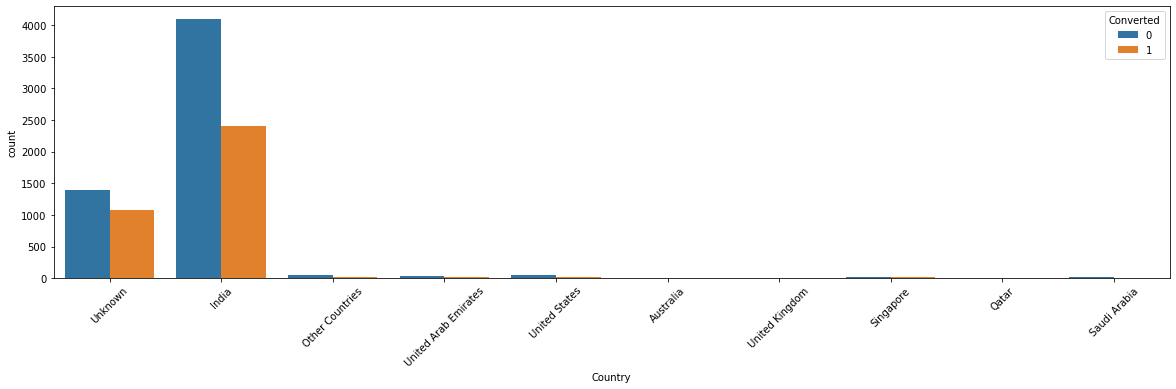

In [51]:
# Let's plot it against Converted
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Country", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

In [52]:
# Now let's look at 'What matters most to you in choosing a course' column
Lead_dropnull['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This column has a lot of null values so imputing it is not a good option, we can mark it as 'Other'

In [53]:
# Marking nulls as 'Other'
Lead_dropnull.loc[(Lead_dropnull['What matters most to you in choosing a course'].isna()==True),'What matters most to you in choosing a course']='Other'

In [54]:
Lead_dropnull['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

We can now replace the categories having single digit count as 'Other'

In [55]:
source_lst3=Lead_dropnull['What matters most to you in choosing a course'].value_counts(dropna=False)
source_lst3=source_lst3[source_lst3<10].index.to_list()
source_lst3

['Flexibility & Convenience']

In [56]:
#Replacing the coulumns
Lead_dropnull['What matters most to you in choosing a course'] = Lead_dropnull['What matters most to you in choosing a course'].replace(source_lst3,'Other')

In [57]:
Lead_dropnull['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64

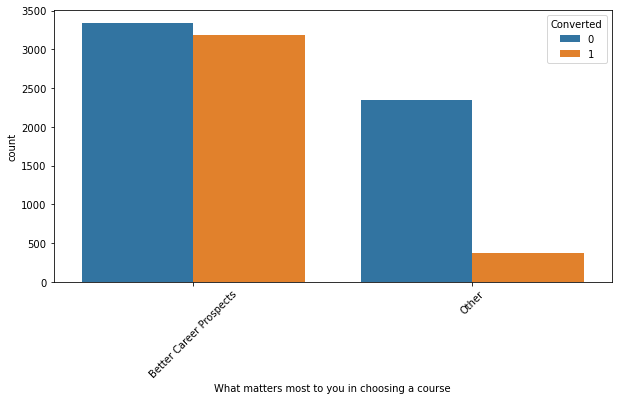

In [58]:
# Let's plot it against Converted
plt.figure(figsize=(10,5))
s = sns.countplot(x = 'What matters most to you in choosing a course', hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

Most of the leads are looking for `Better Career Prospects`

#### Specialization

In [59]:
Lead_dropnull["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [60]:
# Lets categories Nan as Unknown as % is more

Lead_dropnull.loc[(Lead_dropnull['Specialization'].isnull()==True),  'Specialization'] = 'Unknown Specialization'

In [61]:
#Verifying the dataframe
Lead_dropnull['Specialization'].value_counts()

Unknown Specialization               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

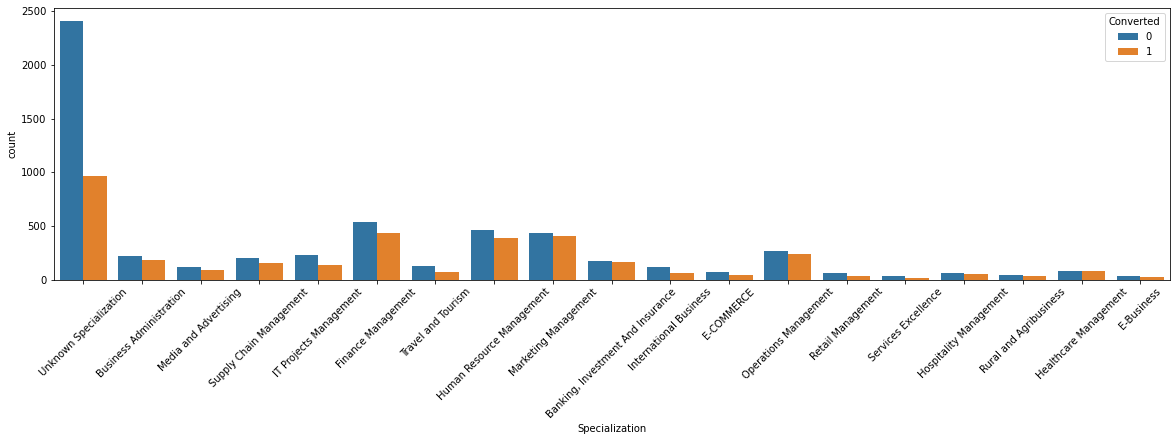

In [62]:
# Lets plot with target variable to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "Specialization", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

In [63]:
### What is your current occupation Column 
Lead_dropnull["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [64]:
# We have large number with uknown profession so lets categories these as Other as it already exists 

In [65]:
Lead_dropnull.loc[(Lead_dropnull['What is your current occupation'].isnull()==True),  'What is your current occupation'] = 'Other'

In [66]:
#Verifying the dataframe
Lead_dropnull['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

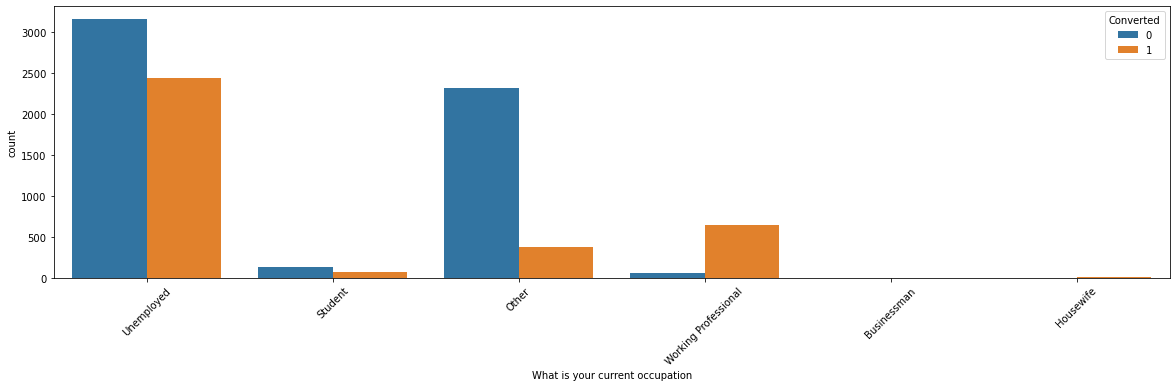

In [67]:
# Lets plot with target variable to understand 
plt.figure(figsize=(20,5))
s = sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### Working Professional and Housewife are more desirable to get converted 
#### More number of unemployeed people are applying and have better conversion


#### Since we will be dealing with the datat that comes right from the forms filled by the people we are going to drop 'Tags'
#### and 'Last Notable Activity','Last Activity' as it has been added by the sales team

In [68]:
Lead_dropnull.drop(['Tags','Last Notable Activity','Last Activity'],inplace=True,axis=1)

In [69]:
Lead_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   float64
 6   Country                                        9240 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

## We are done with data cleaning part. Let's create dummy variable

In [70]:
# Let's change the database name for forther use
df=Lead_dropnull

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   float64
 6   Country                                        9240 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

Now let's convert 'Yes-No' Binary response into 1-0

In [72]:
two_val_col=[]
for col in Lead_dropnull.columns:
    if len(Lead_dropnull[col].value_counts(dropna=False))==2:
        two_val_col.append(col)
two_val_col

['Do Not Email',
 'Converted',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview']

In [73]:
# Let's find the yes and no columns
for col in two_val_col:
    print(Lead_dropnull[col].value_counts(dropna=False),'\n')

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



We have to convert 'Do Not Email' and 'A free copy of Mastering The Interview'

In [74]:
def convert_binary(df, varlist):
    df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'Yes':1,'no':0,'No':0}))

In [75]:
lst=['Do Not Email','A free copy of Mastering The Interview']
convert_binary(df,lst)

In [76]:
# Verifying
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0.00,Unknown,Unknown Specialization,Unemployed,Better Career Prospects,0
1,API,Organic Search,0,0,5.0,674.00,India,Unknown Specialization,Unemployed,Better Career Prospects,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.00,India,Business Administration,Student,Better Career Prospects,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.00,India,Media and Advertising,Unemployed,Better Career Prospects,0
4,Landing Page Submission,Google,0,1,2.0,1428.00,India,Unknown Specialization,Unemployed,Better Career Prospects,0
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1840.61,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,0
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238.00,India,Media and Advertising,Unemployed,Better Career Prospects,1
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199.00,India,Business Administration,Unemployed,Better Career Prospects,1
9238,Landing Page Submission,Google,0,1,3.0,499.00,India,Human Resource Management,Other,Other,0


## Visualizing dummy variables

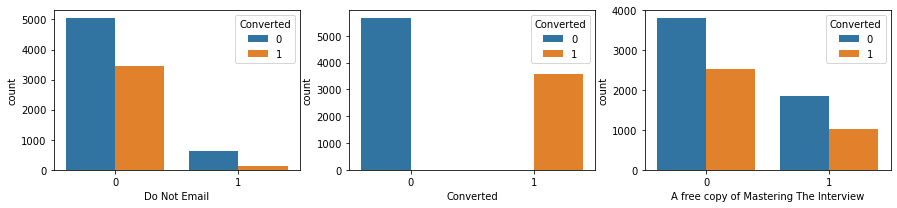

In [77]:
num_col = ['Do Not Email', 'Converted', 'A free copy of Mastering The Interview', ]

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x = i[1], hue = "Converted", data =df)
plt.show()

People who said 'No' to `Do Not Email` have higher conversion chance <br>
People who said 'No' to `A Free copy of Mastering the Interview` have higher chance of conversion

### Let's convert categorical variables into dummy variables

In [78]:
cat_col = list(set(df.columns)-set(df.describe().columns))

In [79]:
for i in cat_col:
    print('column ' , i, '\n',df[i].value_counts(),'\n')

column  What matters most to you in choosing a course 
 Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64 

column  Lead Origin 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

column  Specialization 
 Unknown Specialization               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management   

#### Creating dummy variables for the categorical variables and dropping the level with Unknown/Other/Least Significance

#### Lead Origin

In [80]:
# Lead Origin
lo=pd.get_dummies(df['Lead Origin'],prefix='Lead Origin')
# as it has only single digit count removing Quick Add Form
lo.drop('Lead Origin_Quick Add Form',axis=1,inplace=True)
df=pd.concat([df,lo],axis=1)

In [81]:
# dropping 'Lead Origin'
df.drop('Lead Origin', axis=1,inplace=True)

In [82]:
df.head()

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,Olark Chat,0,0,0.0,0.0,Unknown,Unknown Specialization,Unemployed,Better Career Prospects,0,1,0,0,0
1,Organic Search,0,0,5.0,674.0,India,Unknown Specialization,Unemployed,Better Career Prospects,0,1,0,0,0
2,Direct Traffic,0,1,2.0,1532.0,India,Business Administration,Student,Better Career Prospects,1,0,1,0,0
3,Direct Traffic,0,0,1.0,305.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,1,0,0
4,Google,0,1,2.0,1428.0,India,Unknown Specialization,Unemployed,Better Career Prospects,0,0,1,0,0


#### Lead Source

In [83]:
# Lead Source
ls=pd.get_dummies(df['Lead Source'],prefix='Lead Source')
# as it has only single digit count removing Quick Add Form
ls.drop('Lead Source_Others',axis=1,inplace=True)
df=pd.concat([df,ls],axis=1)

In [84]:
# dropping 'Lead Source'
df.drop('Lead Source', axis=1,inplace=True)

#### Country

In [85]:
# Country
co=pd.get_dummies(df['Country'],prefix='Country')
# as it has only single digit count removing Quick Add Form
co.drop('Country_Unknown',axis=1,inplace=True)
df=pd.concat([df,co],axis=1)

In [86]:
# dropping 'Country'
df.drop('Country', axis=1,inplace=True)

#### Specialization

In [87]:
# Specialization
sp=pd.get_dummies(df['Specialization'],prefix='Specialization')
# as it has only single digit count removing Quick Add Form
sp.drop('Specialization_Unknown Specialization',axis=1,inplace=True)
df=pd.concat([df,sp],axis=1)

In [88]:
# dropping 'Specialization'
df.drop('Specialization', axis=1,inplace=True)

#### What is your current occupation

In [89]:
# What is your current occupation
co=pd.get_dummies(df['What is your current occupation'],prefix='Occupation')
# as it has only single digit count removing Quick Add Form
co.drop('Occupation_Other',axis=1,inplace=True)
df=pd.concat([df,co],axis=1)

In [90]:
# dropping 'What is your current occupation'
df.drop('What is your current occupation', axis=1,inplace=True)

In [91]:
df.shape

(9240, 50)

#### What matters most to you in choosing a course

In [92]:
# What matters most to you in choosing a course
mat=pd.get_dummies(df['What matters most to you in choosing a course'],prefix='Matters')
# as it has only single digit count removing Quick Add Form
mat.drop('Matters_Other',axis=1,inplace=True)
df=pd.concat([df,mat],axis=1)

In [93]:
# dropping 'What matters most to you in choosing a course'
df.drop('What matters most to you in choosing a course', axis=1,inplace=True)

In [94]:
df.shape

(9240, 50)

In [95]:
# Verifying dataframe
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,5.0,674.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,1,2.0,1532.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1.0,305.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,0,1,2.0,1428.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9240 non-null   int64  
 1   Converted                                         9240 non-null   int64  
 2   TotalVisits                                       9240 non-null   float64
 3   Total Time Spent on Website                       9240 non-null   float64
 4   A free copy of Mastering The Interview            9240 non-null   int64  
 5   Lead Origin_API                                   9240 non-null   uint8  
 6   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                         9240 non-null   uint8  
 8   Lead Origin_Lead Import                           9240 non-null   uint8  
 9   Lead Source_Direct 

#### Checking Imbalance in the dataset

In [97]:
sum(df.Converted)/len(df.Converted)*100

38.53896103896104

We can see that the imbalance is fine to make a Logistic Regression Model

## Model Building

### Train Test Split

In [98]:
X=df.drop(['Converted'],axis=1)
y=df['Converted']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [100]:
# Using MinMaxScaler
num_cols=['TotalVisits','Total Time Spent on Website']
scaler=MinMaxScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
1871,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6795,0,0.235294,0.264586,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3516,0,0.294118,0.057590,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8105,0,0.294118,0.668257,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3934,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Building model using train dataset

In [101]:
logreg=LogisticRegression()

#### Feature Selection using RFE

In [102]:
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Reference', False, 35),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Australia', False, 17),
 ('Country_India', False, 20),
 ('Country_Other Countries', False, 19),
 ('Country_Qatar', True, 1),
 ('Country_Saudi Arabia', True, 1),
 ('Country_Singapore', False, 21),
 ('Country_United Arab Emirates', False, 34),
 ('Country_United Kingdom', False, 18),
 ('Country_United States', False, 29),
 ('Specialization_Banking

In [104]:
# storing rfe columns into col which we will use for test dataset
col=X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_Australia', 'Country_India',
       'Country_Other Countries', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations 

#### Assessing the model with stasmodels.api

##### Iteration1

In [106]:
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.4
Date:                Tue, 13 Apr 2021   Deviance:                       5746.8
Time:                        10:43:03   Pearson chi2:                 7.43e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.7432   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                             -1.3026      0.161     -8.105      0.000      -1.618      -0.988
TotalVisits                               0.8461      0.199      4.260      0.000       0.457       1.235
Total Time Spent on Website               3.6960      0.129     28.582      0.000       3.443       3.949
Lead Origin_API                         -22.8394   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Landing Page Submission     -23.0174   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form               -19.2953   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Import                 -23.1660   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                    1.0411      0.120      8.696      0.000       0.806       1.276
Lead Source_Welingak Website              2.1324      0.741      2.880      0.004       0.681       3.584
Country_Qatar                           -23.3062   2.45e+04     -0.001      0.999   -4.81e+04     4.8e+04
Country_Saudi Arabia                     -1.0235      0.803     -1.275      0.202      -2.597       0.550
Specialization_Rural and Agribusiness     0.5511      0.375      1.470      0.142      -0.184       1.286
Occupation_Housewife                     23.4484   2.25e+04      0.001      0.999    -4.4e+04    4.41e+04
Occupation_Working Professional           2.5763      0.182     14.160      0.000       2.220       2.933
Matters_Better Career Prospects           1.2635      0.082     15.328      0.000       1.102       1.425
=========================================================================================================
"""

In [107]:
# Calculating Variance Inflation Factor
def vif(X):
    vif=pd.DataFrame()

    vif['Features']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif=vif.sort_values(by='vif',ascending=False)
    return vif

In [108]:
vif(X_train[col])

,Features,vif
4,Lead Origin_Landing Page Submission,4.55
3,Lead Origin_API,4.03
14,Matters_Better Career Prospects,3.80
1,TotalVisits,2.94
7,Lead Source_Olark Chat,2.47
2,Total Time Spent on Website,2.26
5,Lead Origin_Lead Add Form,1.71
8,Lead Source_Welingak Website,1.24
13,Occupation_Working Professional,1.19
0,Do Not Email,1.11


We can see that p-value for `Lead Origin_Landing Page Submission` is ~1. So let's drop it.

In [109]:
col=col.drop('Lead Origin_Landing Page Submission',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Qatar', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

##### Iteration2

In [110]:
X_train_sm2=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.9
Date:                Tue, 13 Apr 2021   Deviance:                       5747.7
Time:                        10:43:03   Pearson chi2:                 7.43e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2754      0.113    -28.999      0.000      -3.497      -3.054
Do Not Email                             -1.2939      0.160     -8.087      0.000      -1.607      -0.980
TotalVisits                               0.8448      0.199      4.254      0.000       0.456       1.234
Total Time Spent on Website               3.6995      0.129     28.620      0.000       3.446       3.953
Lead Origin_API                           0.1775      0.085      2.083      0.037       0.011       0.344
Lead Origin_Lead Add Form                 3.7216      0.193     19.233      0.000       3.342       4.101
Lead Origin_Lead Import                  -0.1485      0.524     -0.283      0.777      -1.176       0.879
Lead Source_Olark Chat                    1.0422      0.120      8.704      0.000       0.807       1.277
Lead Source_Welingak Website              2.1313      0.740      2.878      0.004       0.680       3.583
Country_Qatar                           -23.3079   2.45e+04     -0.001      0.999   -4.81e+04     4.8e+04
Country_Saudi Arabia                     -1.0261      0.803     -1.278      0.201      -2.600       0.548
Specialization_Rural and Agribusiness     0.5504      0.375      1.468      0.142      -0.185       1.285
Occupation_Housewife                     23.4485   2.25e+04      0.001      0.999    -4.4e+04    4.41e+04
Occupation_Working Professional           2.5759      0.182     14.158      0.000       2.219       2.932
Matters_Better Career Prospects           1.2642      0.082     15.336      0.000       1.103       1.426
=========================================================================================================
"""

We can see a high p-value of ~1 for Country_Qatar. So, let's drop it.

In [111]:
vif(X_train[col])

,Features,vif
13,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
12,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


In [112]:
col=col.drop('Country_Qatar',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

##### Iteration 3

In [113]:
X_train_sm3=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial())
res3=logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.6
Date:                Tue, 13 Apr 2021   Deviance:                       5755.2
Time:                        10:43:04   Pearson chi2:                 7.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2789      0.113    -29.039      0.000      -3.500      -3.058
Do Not Email                             -1.2907      0.160     -8.067      0.000      -1.604      -0.977
TotalVisits                               0.8551      0.199      4.307      0.000       0.466       1.244
Total Time Spent on Website               3.6949      0.129     28.620      0.000       3.442       3.948
Lead Origin_API                           0.1813      0.085      2.129      0.033       0.014       0.348
Lead Origin_Lead Add Form                 3.7272      0.193     19.265      0.000       3.348       4.106
Lead Origin_Lead Import                  -0.1430      0.524     -0.273      0.785      -1.170       0.884
Lead Source_Olark Chat                    1.0434      0.120      8.718      0.000       0.809       1.278
Lead Source_Welingak Website              2.1311      0.740      2.878      0.004       0.680       3.582
Country_Saudi Arabia                     -1.0223      0.803     -1.273      0.203      -2.596       0.551
Specialization_Rural and Agribusiness     0.5536      0.375      1.477      0.140      -0.181       1.288
Occupation_Housewife                     22.4531   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Occupation_Working Professional           2.5794      0.182     14.179      0.000       2.223       2.936
Matters_Better Career Prospects           1.2615      0.082     15.308      0.000       1.100       1.423
=========================================================================================================
"""

In [114]:
# Checking vif
vif(X_train[col])

,Features,vif
12,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
11,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


We can see a high p-val of ~1  for Occupation_Housewife. So, let's drop it.

In [115]:
col=col.drop('Occupation_Housewife',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

##### Iteration 4

In [116]:
X_train_sm4=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial())
res4=logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.9
Date:                Tue, 13 Apr 2021   Deviance:                       5765.8
Time:                        10:43:04   Pearson chi2:                 7.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2716      0.113    -29.009      0.000      -3.493      -3.051
Do Not Email                             -1.2956      0.160     -8.097      0.000      -1.609      -0.982
TotalVisits                               0.8434      0.198      4.251      0.000       0.455       1.232
Total Time Spent on Website               3.6928      0.129     28.624      0.000       3.440       3.946
Lead Origin_API                           0.1752      0.085      2.059      0.039       0.008       0.342
Lead Origin_Lead Add Form                 3.7320      0.193     19.321      0.000       3.353       4.111
Lead Origin_Lead Import                  -0.1512      0.524     -0.289      0.773      -1.178       0.876
Lead Source_Olark Chat                    1.0406      0.120      8.698      0.000       0.806       1.275
Lead Source_Welingak Website              2.1170      0.740      2.859      0.004       0.666       3.568
Country_Saudi Arabia                     -1.0254      0.802     -1.278      0.201      -2.598       0.547
Specialization_Rural and Agribusiness     0.5488      0.375      1.464      0.143      -0.186       1.284
Occupation_Working Professional           2.5739      0.182     14.149      0.000       2.217       2.930
Matters_Better Career Prospects           1.2648      0.082     15.352      0.000       1.103       1.426
=========================================================================================================
"""

In [117]:
# Checking vif
vif(X_train[col])

,Features,vif
11,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
10,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


We can see that `Lead Origin_Lead Import` has high p-value =0.769. So, we can drop it.

In [118]:
col=col.drop('Lead Origin_Lead Import',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

##### Iteration 5

In [119]:
X_train_sm5=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm5,family=sm.families.Binomial())
res5=logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.9
Date:                Tue, 13 Apr 2021   Deviance:                       5765.9
Time:                        10:43:04   Pearson chi2:                 7.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2744      0.112    -29.139      0.000      -3.495      -3.054
Do Not Email                             -1.2949      0.160     -8.093      0.000      -1.609      -0.981
TotalVisits                               0.8472      0.198      4.279      0.000       0.459       1.235
Total Time Spent on Website               3.6946      0.129     28.666      0.000       3.442       3.947
Lead Origin_API                           0.1765      0.085      2.078      0.038       0.010       0.343
Lead Origin_Lead Add Form                 3.7347      0.193     19.357      0.000       3.357       4.113
Lead Source_Olark Chat                    1.0420      0.120      8.715      0.000       0.808       1.276
Lead Source_Welingak Website              2.1169      0.740      2.859      0.004       0.666       3.568
Country_Saudi Arabia                     -1.0248      0.803     -1.277      0.202      -2.598       0.548
Specialization_Rural and Agribusiness     0.5497      0.375      1.466      0.143      -0.185       1.285
Occupation_Working Professional           2.5737      0.182     14.151      0.000       2.217       2.930
Matters_Better Career Prospects           1.2647      0.082     15.351      0.000       1.103       1.426
=========================================================================================================
"""

In [120]:
# Checking vif
vif(X_train[col])

,Features,vif
10,Matters_Better Career Prospects,2.70
3,Lead Origin_API,2.43
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
9,Occupation_Working Professional,1.19
0,Do Not Email,1.06
8,Specialization_Rural and Agribusiness,1.01


We can see `Country_Saudi Arabia` has high p-value. So, we are going to drop it.

In [121]:
col=col.drop('Country_Saudi Arabia',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

##### Iteration 6

In [122]:
X_train_sm6=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm6,family=sm.families.Binomial())
res6=logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2883.8
Date:                Tue, 13 Apr 2021   Deviance:                       5767.6
Time:                        10:43:04   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2764      0.112    -29.170      0.000      -3.497      -3.056
Do Not Email                             -1.3021      0.160     -8.133      0.000      -1.616      -0.988
TotalVisits                               0.8484      0.198      4.288      0.000       0.461       1.236
Total Time Spent on Website               3.6920      0.129     28.660      0.000       3.440       3.944
Lead Origin_API                           0.1795      0.085      2.113      0.035       0.013       0.346
Lead Origin_Lead Add Form                 3.7378      0.193     19.373      0.000       3.360       4.116
Lead Source_Olark Chat                    1.0401      0.120      8.701      0.000       0.806       1.274
Lead Source_Welingak Website              2.1177      0.740      2.860      0.004       0.666       3.569
Specialization_Rural and Agribusiness     0.5524      0.375      1.473      0.141      -0.183       1.287
Occupation_Working Professional           2.5703      0.182     14.141      0.000       2.214       2.927
Matters_Better Career Prospects           1.2648      0.082     15.349      0.000       1.103       1.426
=========================================================================================================
"""

In [123]:
# Checking vif
vif(X_train[col])

,Features,vif
9,Matters_Better Career Prospects,2.70
3,Lead Origin_API,2.43
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
8,Occupation_Working Professional,1.19
0,Do Not Email,1.06
7,Specialization_Rural and Agribusiness,1.01


Since `Specialization_Rural and Agribusiness` has high p-val =0.141. So, let's drop it.

In [124]:
col=col.drop('Specialization_Rural and Agribusiness',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

#### Iteration 7

In [125]:
X_train_sm7=sm.add_constant(X_train[col])
logm7=sm.GLM(y_train,X_train_sm7,family=sm.families.Binomial())
res7=logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.9
Date:                Tue, 13 Apr 2021   Deviance:                       5769.8
Time:                        10:43:04   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.2732      0.112    -29.160      0.000      -3.493      -3.053
Do Not Email                       -1.2993      0.160     -8.114      0.000      -1.613      -0.985
TotalVisits                         0.8549      0.198      4.327      0.000       0.468       1.242
Total Time Spent on Website         3.6902      0.129     28.660      0.000       3.438       3.943
Lead Origin_API                     0.1747      0.085      2.060      0.039       0.008       0.341
Lead Origin_Lead Add Form           3.7356      0.193     19.367      0.000       3.358       4.114
Lead Source_Olark Chat              1.0421      0.120      8.720      0.000       0.808       1.276
Lead Source_Welingak Website        2.1137      0.740      2.855      0.004       0.663       3.565
Occupation_Working Professional     2.5681      0.182     14.136      0.000       2.212       2.924
Matters_Better Career Prospects     1.2670      0.082     15.378      0.000       1.105       1.428
===================================================================================================
"""

In [126]:
# Checking vif
vif(X_train[col])

,Features,vif
8,Matters_Better Career Prospects,2.70
3,Lead Origin_API,2.43
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.04
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
7,Occupation_Working Professional,1.19
0,Do Not Email,1.06


In Iteration 7 we can see that p-values for all the parameters is less than 0.05 and VIF is less than 5.<br>
So, We will go with Iteration 7.

##### Predicting y values

In [127]:
y_train_pred=res7.predict(X_train_sm7).values.reshape(-1)
y_train_pred

array([0.3122889 , 0.30390923, 0.41934201, ..., 0.3122889 , 0.1933256 ,
       0.11340741])

In [128]:
# Creating a dataframe with actual Converted flag and predicted probabilities
y_train_pred_df = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred, 'Lead_Score':np.round(y_train_pred*100).astype('int')})
y_train_pred_df['LeadID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Prob,Lead_Score,LeadID
0,0,0.312289,31,1871
1,0,0.303909,30,6795
2,0,0.419342,42,3516
3,0,0.670658,67,8105
4,0,0.312289,31,3934


 #### Assigning a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads

## Plotting ROC Curve

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
from sklearn import metrics

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False )

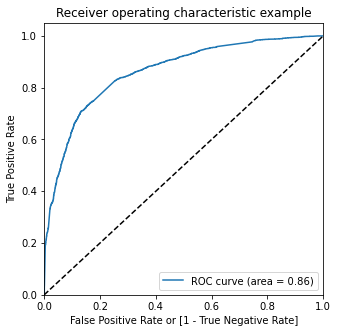

In [132]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

##### We  see that we have a good ROC curve

##### We need to find out optimal probability cut off to get probability range for high conversion

In [133]:
# Let's create columns with different probability cut offs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]=y_train_pred_df.Converted_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_df

,Converted,Converted_Prob,Lead_Score,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.312289,31,1871,1,1,1,1,0,0,0,0,0,0
1,0,0.303909,30,6795,1,1,1,1,0,0,0,0,0,0
2,0,0.419342,42,3516,1,1,1,1,1,0,0,0,0,0
3,0,0.670658,67,8105,1,1,1,1,1,1,1,0,0,0
4,0,0.312289,31,3934,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.849326,85,350,1,1,1,1,1,1,1,1,1,0
6464,1,0.997209,100,79,1,1,1,1,1,1,1,1,1,1
6465,1,0.312289,31,8039,1,1,1,1,0,0,0,0,0,0
6466,0,0.193326,19,6936,1,1,0,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.522573     0.983779     0.238381
0.2   0.2  0.698361     0.898216     0.575212
0.3   0.3  0.774428     0.832117     0.738881
0.4   0.4  0.807205     0.706813     0.869065
0.5   0.5  0.802257     0.653285     0.894053
0.6   0.6  0.789270     0.580697     0.917791
0.7   0.7  0.769017     0.488240     0.942029
0.8   0.8  0.742424     0.378751     0.966517
0.9   0.9  0.694341     0.208840     0.993503


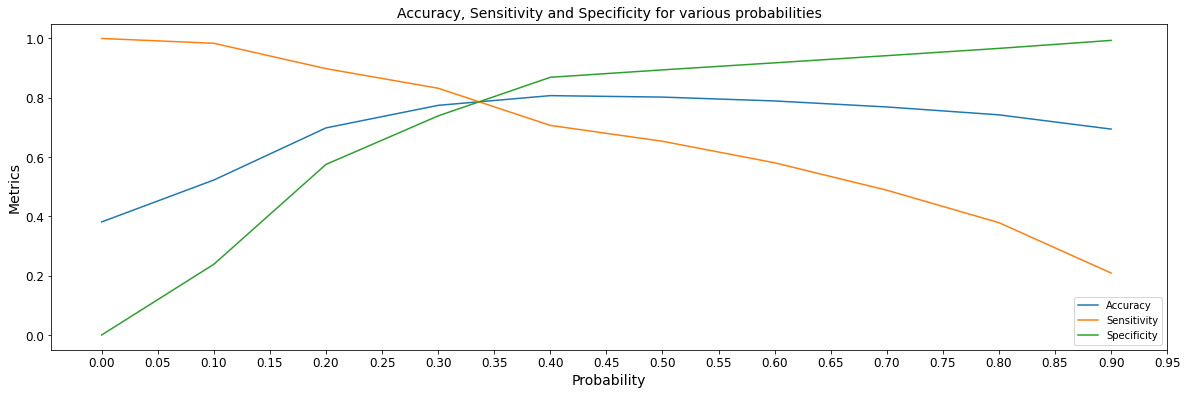

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'], figsize=(20,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

##### From the above sensitivity-specificity plot we can see that optimal cut off point is found to be 0.34
##### Using this to divide the dataset into converted or not

In [136]:
y_train_pred_df['final_predicted']=y_train_pred_df.Converted_Prob.map(lambda x:1 if x>0.34 else 0)
y_train_pred_df

,Converted,Converted_Prob,Lead_Score,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.312289,31,1871,1,1,1,1,0,0,0,0,0,0,0
1,0,0.303909,30,6795,1,1,1,1,0,0,0,0,0,0,0
2,0,0.419342,42,3516,1,1,1,1,1,0,0,0,0,0,1
3,0,0.670658,67,8105,1,1,1,1,1,1,1,0,0,0,1
4,0,0.312289,31,3934,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.849326,85,350,1,1,1,1,1,1,1,1,1,0,1
6464,1,0.997209,100,79,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.312289,31,8039,1,1,1,1,0,0,0,0,0,0,0
6466,0,0.193326,19,6936,1,1,0,0,0,0,0,0,0,0,0


##### Let's evaluate different metrics for this model

In [137]:
# Calculating Paramerters of a Logistic Regression Model
def log_model_params(y_actual,y_predicted):
    from sklearn import metrics
    confusion=metrics.confusion_matrix(y_actual,y_predicted)
    TP=confusion[1,1]
    FP=confusion[0,1]
    TN=confusion[0,0]
    FN=confusion[1,0]
    accuracy=(TP+TN)/float(TP+TN+FP+FN)*100    
    sensitivity=TP/float(FN+TP)*100
    specificity=TN/float(TN+FP)*100
    FP_rate=100-specificity
    Positive_pred_value=TP/float(TP+FP)
    Negative_pred_value=TN/float(TN+FN)
    precision=TP/float(TP+FP)*100
    params={'accuracy':accuracy,'TN':TN,'FP':FP,'FN':FN,'TP':TP,'sensitivity':sensitivity,'specificity':specificity,'precision':precision,'False_Positive_Rate':FP_rate,'Positve_Prediction_value':Positive_pred_value,'Negative_Prediction_value':Negative_pred_value}
    return params

In [138]:
log_model_params(y_train_pred_df.Converted,y_train_pred_df.final_predicted)

{'accuracy': 79.96289424860854,
 'TN': 3357,
 'FP': 645,
 'FN': 651,
 'TP': 1815,
 'sensitivity': 73.60097323600974,
 'specificity': 83.88305847076461,
 'precision': 73.78048780487805,
 'False_Positive_Rate': 16.11694152923539,
 'Positve_Prediction_value': 0.7378048780487805,
 'Negative_Prediction_value': 0.8375748502994012}

#### From this model, we are getting accuracy of 80% and sensitivity of 73% which is not exactly matching the expectations of CEO to get conversion rate of 80% but if we decrease the probability cut-off then sensitivity will improve resulting into low accuracy.
#### As per buisiness requirement we can adjust probability cut off.
#### This model is helping us to fulfill our objective of finding Hot Leads.

### Let's check with cut-off 0.31 to get sensitivity as 80 percent(Business Requirement)

In [139]:
y_train_pred_df['business_predicted']=y_train_pred_df.Converted_Prob.map(lambda x:1 if x>0.31 else 0)
y_train_pred_df

,Converted,Converted_Prob,Lead_Score,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,business_predicted
0,0,0.312289,31,1871,1,1,1,1,0,0,0,0,0,0,0,1
1,0,0.303909,30,6795,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.419342,42,3516,1,1,1,1,1,0,0,0,0,0,1,1
3,0,0.670658,67,8105,1,1,1,1,1,1,1,0,0,0,1,1
4,0,0.312289,31,3934,1,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.849326,85,350,1,1,1,1,1,1,1,1,1,0,1,1
6464,1,0.997209,100,79,1,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.312289,31,8039,1,1,1,1,0,0,0,0,0,0,0,1
6466,0,0.193326,19,6936,1,1,0,0,0,0,0,0,0,0,0,0


In [140]:
# Calculating parameters for cut-off 0.31
log_model_params(y_train_pred_df.Converted,y_train_pred_df.business_predicted)

{'accuracy': 77.72108843537416,
 'TN': 2990,
 'FP': 1012,
 'FN': 429,
 'TP': 2037,
 'sensitivity': 82.60340632603406,
 'specificity': 74.71264367816092,
 'precision': 66.80878976713677,
 'False_Positive_Rate': 25.287356321839084,
 'Positve_Prediction_value': 0.6680878976713677,
 'Negative_Prediction_value': 0.8745247148288974}

### We can see above that for our business requirement of lead conversion rate to be above 80%, we are getting a model which with 77% accuracy gives us a sensitivity of 82%

### We will now compare the two cut-offs and there results to find out whether we should suggest the CEO to stick with optimal Lead Score or compromise accuracy to get better Lead Conversion rate(sensitivity)

In [141]:
log_model_params(y_train_pred_df.final_predicted,y_train_pred_df.business_predicted)

{'accuracy': 90.89363017934447,
 'TN': 3419,
 'FP': 589,
 'FN': 0,
 'TP': 2460,
 'sensitivity': 100.0,
 'specificity': 85.30439121756487,
 'precision': 80.68219088225648,
 'False_Positive_Rate': 14.69560878243513,
 'Positve_Prediction_value': 0.8068219088225648,
 'Negative_Prediction_value': 1.0}

### We can see above that when we compare the two results from 0.34 cut-ff and 0.31 cut-off sensitivity is 100% which means that if we use cut-ff of 0.31 we will correctly identify all the leads who will convert 
### But, we will also incorrectly identify some leads as 'will convert' which will not convert.

### As the business problem does not state any hard deadline to meet a certain target for the Sales Team, we can go with 0.31 cut-off.

### Let's make predictions on the Test dataset

In [142]:
# Using MinMaxScaler for test set
num_cols=['TotalVisits','Total Time Spent on Website']
X_test[num_cols]=scaler.transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
4269,0,0.470588,0.549274,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7766,0,0.294118,0.032055,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
9199,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4359,0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [143]:
# Let's check rfe columns again
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

In [144]:
# Defining X_test dataset on col
X_test=X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Working Professional,Matters_Better Career Prospects
4269,0,0.470588,0.549274,1,0,0,0,0,0
2376,0,0.000000,0.000000,0,1,0,0,0,1
7766,0,0.294118,0.032055,1,0,0,0,1,1
9199,0,0.000000,0.000000,1,0,1,0,0,1
4359,0,0.000000,0.000000,0,1,0,0,0,1


In [145]:
X_test.shape

(2772, 9)

In [146]:
# adding constant
X_test_sm=sm.add_constant(X_test)

Making predictions on test set using Iteration 7

In [147]:
y_test_pred=res7.predict(X_test_sm).values.reshape(-1)
y_test_pred

array([0.33866307, 0.84932641, 0.75144013, ..., 0.3122889 , 0.23185803,
       0.84932641])

In [148]:
y_test_pred_df = pd.DataFrame({'Converted':y_test.values, 'Lead_Score':np.round(y_test_pred*100).astype('int'), 'Converted_Prob':y_test_pred})
y_test_pred_df['LeadID'] = y_test.index
y_test_pred_df.head()

,Converted,Lead_Score,Converted_Prob,LeadID
0,1,34,0.338663,4269
1,1,85,0.849326,2376
2,1,75,0.751440,7766
3,0,31,0.312289,9199
4,1,85,0.849326,4359


In [149]:
# Target variable prediction on the basis of cut-off=0.31
y_test_pred_df['final_predicted']=y_test_pred_df.Converted_Prob.map(lambda x:1 if x>0.31 else 0)
y_test_pred_df

,Converted,Lead_Score,Converted_Prob,LeadID,final_predicted
0,1,34,0.338663,4269,1
1,1,85,0.849326,2376,1
2,1,75,0.751440,7766,1
3,0,31,0.312289,9199,1
4,1,85,0.849326,4359,1
...,...,...,...,...,...
2767,0,13,0.125925,8649,0
2768,1,85,0.849326,2152,1
2769,0,31,0.312289,7101,1
2770,0,23,0.231858,5331,0


##### Let's evaluate different metrics for Test dataset

In [150]:
log_model_params(y_test_pred_df.Converted,y_test_pred_df.final_predicted)

{'accuracy': 78.10245310245311,
 'TN': 1245,
 'FP': 432,
 'FN': 175,
 'TP': 920,
 'sensitivity': 84.01826484018264,
 'specificity': 74.23971377459749,
 'precision': 68.04733727810651,
 'False_Positive_Rate': 25.76028622540251,
 'Positve_Prediction_value': 0.6804733727810651,
 'Negative_Prediction_value': 0.8767605633802817}

### We can see that the accuracy of test dataset which is 78% and sensitivity is 84% which is matching with train dataset. 
### So our model is performing good on both train and Test dataset.
### It is also fulfilling our Business Requirement

### Adding Scores to the original dataframe

In [151]:
# Create Dataset with y_train Lead Number and Lead score
y_train_score = y_train_pred_df[['LeadID','Lead_Score']]

# Create Dataset with y_test Lead Number and Lead score
y_test_score = y_test_pred_df[['LeadID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
ld_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Lead Number to concatenate the score dataset to the original data
ld_score.set_index('LeadID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
lead_original = lead_original.join(ld_score['Lead_Score'])

lead_original.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,31
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,44
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,76
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,21
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,72


In [152]:
lead_original.shape

(9240, 38)

## For Lead_Score>31 are the 'Hot Leads' that the Sales team can approach.

## Determining Coefficients and Final Equation for the model

In [153]:
res7.params[1:].sort_values(ascending=False)

Lead Origin_Lead Add Form          3.735612
Total Time Spent on Website        3.690194
Occupation_Working Professional    2.568117
Lead Source_Welingak Website       2.113739
Matters_Better Career Prospects    1.266959
Lead Source_Olark Chat             1.042105
TotalVisits                        0.854924
Lead Origin_API                    0.174739
Do Not Email                      -1.299315
dtype: float64

## The final equation

In [154]:
equation=''
lst=res7.params[1:].sort_values(ascending=False)
for i in range(lst.shape[0]):
    equation=equation+'('+str(np.round(lst[i],2))+')'+'*'+lst.index[i]+' + '
equation=equation+'('+str(np.round(res7.params[0],2))+')'
equation

'(3.74)*Lead Origin_Lead Add Form + (3.69)*Total Time Spent on Website + (2.57)*Occupation_Working Professional + (2.11)*Lead Source_Welingak Website + (1.27)*Matters_Better Career Prospects + (1.04)*Lead Source_Olark Chat + (0.85)*TotalVisits + (0.17)*Lead Origin_API + (-1.3)*Do Not Email + (-3.27)'

Odds(Converted)='(3.74)*Lead Origin_Lead Add Form + (3.69)*Total Time Spent on Website + (2.57)*Occupation_Working Professional + (2.11)*Lead Source_Welingak Website + (1.27)*Matters_Better Career Prospects + (1.04)*Lead Source_Olark Chat + (0.85)*TotalVisits + (0.17)*Lead Origin_API + (-1.3)*Do Not Email + (-3.27)'

# Conclusion

## X Education has to focus on following variables to identify Hot Leads:


1. Lead Origin_Lead Add Form
2. Total Time Spent on Website
3. Occupation_Working Professional
4. Lead Source_Welingak Website
5. Do Not Email

## Below are the few more inferences from EDA

1. We can see that if the lead source is `Reference` and `Welingak Website` then there is high chances of conversion.
2. People who sent `SMS` have high chances of conversion
3. `Working Professional` and `Housewife` are more desirable to get converted
4. People looking for `better career Prospects` has more chances to convert
5. People who said No to `do not email` has higher conversion chance

### This model is adjustable to the company's requirement . We can change the  Lead_Score cut off to change the sensitivity and accuracy of the model. This will depend on business requirement.

##### The Metrics values of Train and Test dataset are approx. the same and it almost matching.